# Pequeño manual de neuroLab para Red Neuronal supervisada unidireccional con algoritmo backpropagatión.

In [72]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import neurolab as nl

sys.path.append("/Users/tmorales/tmp/redesNeuronales/neuronalNetwork/src")
from NeuronalNetwork import NeuronalNetwork
from plotData import plot_dataset, plot_error

## Tipo de Red Neuronal

 * Multicapa con aprendizaje supervisado unidireccional y algortihm backpropagatión.


## Modificaciones

Las modificaciones que podemos realizar a los diferentes DataSet:

 * A ) En la arquitectura de la red.
 
 * B ) Función de activación.
 
 * C ) Inicialización de los pesos.
 
 * D ) Entrenamiento (algoritmo de convergencia).
 
 * E ) El tipo de error que mide el buen funcionamiento de la red.
----------------------------------------------------

### A ) Arquitectura de la red

#### Ejemplo 1:  Dos input, 1 capa de entrenamiento con 3 neuronas y 1 neurona en la capa de salida

In [105]:
net = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [3, 1])
net.ci 
net.co
print "Número de capas: {0}".format(len(net.layers))
print "Weights of the layer 1: {0}".format(net.layers[0].np['w'])
print "Bias of the layer 2: {0}".format(net.layers[1].np['b'])

Número de capas: 2
Weights of the layer 1: [[ 4.01308054 -2.72308365]
 [ 3.7682847   3.05287249]
 [ 4.82832837 -0.45524191]]
Bias of the layer 2: [ 0.]


#### Ejemplo 2:  Dos input, 2 capa de entrenamiento con 4 neuronas y 2 neurona en la capa de salida

In [ ]:
net = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [4,4,2])
print "Número de capas: {0}".format(len(net.layers))

 #### Ejemplo 3:  10 input, 4 capa de entrenamiento con 20 neuronas y 10 neurona en la capa de salida

In [5]:
inputL = [[-0.5, 0.5] for i in range(10)]
hiddenL = [20 for i in range(4)]
outputL = [10]
hiddenOutputL = hiddenL+outputL

In [4]:
net = nl.net.newff(inputL, hiddenOutputL)
print "Número de capas: {0}".format(len(net.layers))

Número de capas: 5


En todos los ejemplos anteriores la función de activación era **TanSig** que es la de defecto. Para seleccionar la función de activación para cada una de las capas.

## B) Función de activación  

#### Ejemplo 4:  10 input, 4 capa de entrenamiento con 20 neuronas y 10 neurona en la capa de salida. Función de activación **logSig** para todas las capas.

In [24]:
inputL = [[-0.5, 0.5] for i in range(10)]
hiddenL = [20 for i in range(4)]
outputL = [10]
hiddenOutputL = hiddenL+outputL
activationFunction = [nl.trans.LogSig for i in range(5)]

In [25]:
net = nl.net.newff(inputL, hiddenOutputL, activationFunction)

### Ejemplo 4: 10 input, 4 capa de entrenamiento con 20 neuronas y 10 neurona en la capa de salida. Función de activación **logSig** para todas las capas de entrenamiento y **TanSig** para la capa output.

In [26]:
inputL = [[-0.5, 0.5] for i in range(10)]
hiddenL = [20 for i in range(4)]
outputL = [10]
hiddenOutputL = hiddenL+outputL
activationFunction = [nl.trans.LogSig for i in range(4)] + [nl.trans.TanSig]

In [27]:
net = nl.net.newff(inputL, hiddenOutputL, activationFunction)

## D) Entrenamiento de la red

Entrenamiento de la red supervisado utilizando el algoritmo *"backpropagation"*. Según la documentación del código las posibilidades son las [siguientes](https://pythonhosted.org/neurolab/lib.html).

train_gd, train_gdm, train_gda, train_gdx, train_rprop, train_bfgs*, train_cg

### Ejemplo 5:  Dos input, 2 capas de entrenamiento con 4 neuronas y 2 neuronas en la capa de salida. El conjunto de datos de entrenamiento es el siguiente.

In [43]:
# Create train samples
x = np.linspace(-7, 7, 20)
y = np.sin(x) * 0.5 

size = len(x)
input = x.reshape(size,1)
target = y.reshape(size,1)

In [53]:
# Create network with 2 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gd          # Gradient descent backpropogation

In [54]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm          # Gradient descent with momentum backpropagation

### E ) El tipo de error que mide el buen funcionamiento de la red.

### Ejemplo 6:

**CCE (Cross-entropy error function)**: 

In [86]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm  # Gradient descent with momentum backpropagation
net.errorf = nl.error.CEE()
err_CCE = net.train(input, target, show=500, adapt=True)     # SSE (Sum Square Error function) - Default error -

Epoch: 500; Error: 17.3546634292;
The maximum number of train epochs is reached


**MAE (Mean absolute error function)**

In [82]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm                         # Gradient descent with momentum backpropagation
net.errorf = nl.error.MAE()                             # MAE (Mean absolute Error function)
err_MAE = net.train(input, target, show=500, adapt=True)      

Epoch: 500; Error: 0.113654772423;
The maximum number of train epochs is reached


**MSE (Mean Squared error function)**

In [83]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm                         # Gradient descent with momentum backpropagation
net.errorf = nl.error.MSE()                             # MSE (Mean Squared error function)
err_MSE = net.train(input, target, show=500, adapt=True)      

The goal of learning is reached


**SAE (Sum Absolute Error function)**

In [84]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm                         # Gradient descent with momentum backpropagation
net.errorf = nl.error.SAE()                             # SAE (Sum Absolute Error function) 
err_SAE = net.train(input, target, show=500, adapt=True)      

Epoch: 500; Error: 2.07531247551;
The maximum number of train epochs is reached


**SSE (Sum Square error function)**

In [85]:
# Create network with 5 layers and random initialized
net = nl.net.newff([[-7,7]],[7,1]) 
# Train network
net.trainf = nl.train.train_gdm                          # Gradient descent with momentum backpropagation
err_SSE = net.train(input, target, show=500, adapt=True)     # SSE (Sum Square Error function) - Default error -

Epoch: 500; Error: 0.0121628043451;
The maximum number of train epochs is reached


**El error queda almacenado en un array de numpy, habrá tantos errores como ciclos hayas seleccionado (por defecto 500).**

In [88]:
print len(err_CCE); print len(err_MAE); print len(err_MSE); print len(err_SAE); print len(err_SSE)

500
500
38
500
500


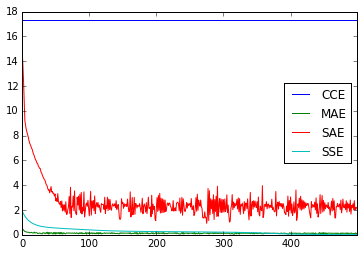

In [89]:
pd.DataFrame({"CCE": err_CCE,
              "MAE": err_MAE,
              "SAE": err_SAE,
              "SSE": err_SSE}).plot()

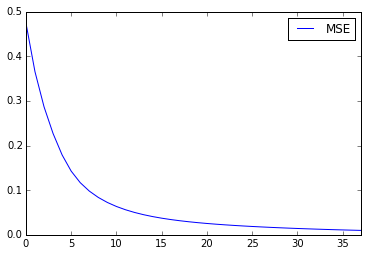

In [90]:
pd.DataFrame({"MSE": err_MSE}).plot()